# Welcome to the Dark Art of Coding:
## Introduction to Machine Learning
k-Means Clustering

<img src='../universal_images/dark_art_logo.600px.png' width='300' style="float:right">

# Objectives
---

In this session, students should expect to:

* Cover an overview of k-Means Clustering
* Examine code samples that walk us through **The Process™**:
   * Prep the data
   * Choose the model
   * Choose appropriate hyperparameters
   * Fit the model
   * Apply the model
   * Examine the results
* Explore a deep dive into this model
* Review some gotchas that might complicate things
* Review tips related to learning more

# Overview: k-Means Clustering
---

The goal of a clustering algorithm is to assign data points to the same group if they are similar and to assign data points to different groups if they are different.

Clustering models are popular machine learning models because they:

* are unsupervised and thus don't require pre-determined labels
* can accommodate multidimensional datasets
* can, for simple cases, be fairly easy to interpret, especially in 2D/3D via charts

The k-Means Clustering algorithm: 

* looks for the arithmetic mean of all points in a cluster to identify the cluster centers
* groups points together by identifying the closest cluster center

For this example, we will use the KMeans model. The sklearn.cluster module has a number of clustering models, including:

* AffinityPropagation
* DBSCAN
* KMeans
* MeanShift
* SpectralClustering
* and more...

With this background, let's apply **The Process™** on the KMeans Clustering model.

## Prep the data

We start with a set of standard imports...

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

# NOTE: during the Choose the Model step, we will import the 
#     model we want, but there is no reason you can't import it here.
# from sklearn.cluster import KMeans

### Prep the training data and test data

As mentioned, a number of data generating functions exist in Scikit-Learn to help you create data sets that you can use to play with and manipulate the models. For this example, I want to explore one of these data generation libraries: 

```python
sklearn.datasets.samples_generator.make_blobs
```

This dataset generator produces preformatted `features` matrices and `target` arrays.

This dataset is composed of:

* a `features matrix` of `x` and `y` vectors that can be plotted on a chart
* a `target array` of cluster labels

In this example, I wanted to highlight the fact that changes to the standard deviation (`std`) of the clusters OR to the `random_state` seed can significantly alter the outcome of the `make_blobs()` function. To that end, I decided to highlight those two variables and make it easy to change them.

In [13]:
from sklearn.datasets.samples_generator import make_blobs

cluster_std = 0.70      # std of 0.70 gives tight clusters, try 3!
random_state = 13

X, y = make_blobs(n_samples=400,
                  centers=4,
                  cluster_std=cluster_std,
                  random_state=random_state)

Since we have never made blobs before, we should check to see what the output looks like:

In [14]:
X.shape

(400, 2)

In [15]:
X[:5]

array([[ 6.25899533,  9.23696263],
       [ 2.34655063,  5.34350419],
       [ 8.71515482, -1.32204244],
       [ 7.22234292,  8.24111636],
       [ 2.32679551,  4.77435113]])

In [16]:
y[:100]

array([1, 3, 2, 1, 3, 3, 3, 2, 3, 2, 2, 3, 1, 0, 1, 1, 1, 2, 2, 1, 2, 0,
       1, 3, 1, 2, 3, 1, 2, 2, 3, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 1, 1, 0,
       3, 2, 1, 3, 0, 2, 2, 1, 0, 2, 0, 1, 0, 1, 0, 3, 2, 2, 3, 1, 3, 2,
       1, 0, 2, 0, 1, 0, 1, 0, 3, 0, 3, 1, 3, 2, 1, 1, 2, 0, 3, 0, 1, 1,
       0, 1, 1, 2, 3, 0, 0, 3, 0, 0, 2, 3])

**TIP**: A quick way to confirm exactly which categories you have, if you have lots of them is to use the `np.unique()` method to deduplicate the elements stored in your array (i.e. `y`).

In [17]:
np.unique(y)

array([0, 1, 2, 3])

In [19]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y)

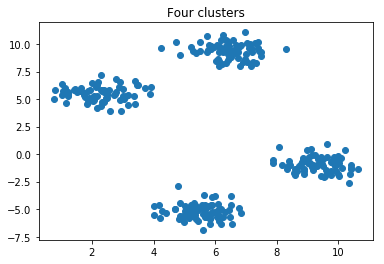

In [22]:
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.title("Four clusters");

## Choose the Model

In [23]:
from sklearn.cluster import KMeans

## Choose Appropriate Hyperparameters

Here we choose to assign xx hyperparameters: `xx` and `xx`. We will discuss both later.

In [24]:
model = KMeans(n_clusters=4)

There are a number of hyperparameters... we will cover several in greater depth later.

```python
KMeans(
    n_clusters=8,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    precompute_distances='auto',
    verbose=0,
    random_state=None,
    copy_x=True,
    n_jobs=None,
    algorithm='auto',
)
```

## Fit the Model

This model doesn't need OR use any labels, so we simply feed in the `X_train` data.

In [25]:
model.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Apply the Model

In [30]:
y_pred = model.predict(X_test)

In [31]:
y_pred.shape

(100,)

In [50]:
y_pred[:5]

array([0, 3, 1, 0, 0], dtype=int32)

## Examine the results

If we plot the clusters and use the predicted labels as the basis for assigning colors, we see that the model correctly grouped the samples into clusters.

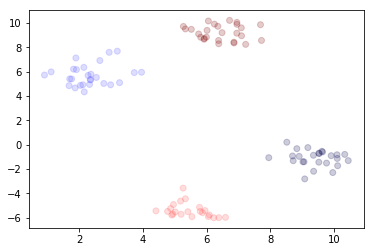

In [51]:
plt.scatter(X_test[:, 0], X_test[:, 1],
            c=y_pred,
            cmap='seismic', alpha=0.2);

We mentioned that the model drills down to a center for each cluster. If you want to know where the centers are, the model stores them as an attribute called `.cluster_centers_`. 

**Notice** the trailing underscore (`_`) at the end of the attribute name to show that it is a computed value.

In [52]:
ctrs = model.cluster_centers_

With these points, it is simple enough to plot them on the chart. Here we highlight them as large (`s=150`) white dots (`c='white'`) outlined in black (`edgecolors='black'`)

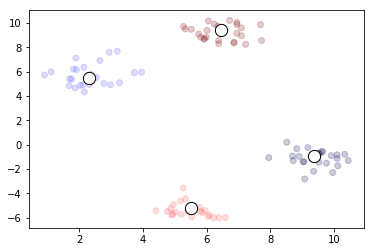

In [53]:
plt.scatter(X_test[:, 0], X_test[:, 1],
            c=y_pred,
            cmap='seismic', alpha=0.2)

plt.scatter(ctrs[:, 0], ctrs[:, 1],
            c='white',
            edgecolors='black',
            s=150,
            );

# Deep Dive
---

The k-Means Clustering model works based on a process called **Expectation-Maximization**. In this process, the model:

* starts by randomly picking some cluster centers
* repeats the following cycle until the model converges
    * Expectation: assign points to the closest cluster center
    * Maximization: use the points of the newly formed clusters to calculate a new mean to use as a new cluster center
    
The process is designed such that for every cycle of the Expectation and Maximization steps, the model will always have a better estimation of any given cluster.

# Gotchas
---

**No global guarantees**: despite the promise of convergence... there is no guarantee that as a whole the clusters produced will globally be the most suitable clusters.

It really depends on the randomly selected initial cluster centers. To overcome this limitation, the model typically runs the algorithm multiple times. The default `n_init` is set at `10`.

**You must decide on the number of clusters**: when we set the hyperparameters, we need to initialize the model with the some number of clusters. The default `n_clusters` is set at `8`.

* There are other models that may provide some measure of the fitness of the number of clusters: `GaussianMixture`
* There are other models that can choose a suitable number of clusters: `DBSCAN`, `MeanShift`

**Speed considerations**: clustering algorithms can be slow on large datasets.

**What do the colors OR category labels really mean?**:

Turns out, not much. The labels aren't magic, they don't carry meaning beyond: every sample in this set with this label is tied to or associated with samples that carry the same label. Due to the way that the model randomizes the clustering process, during one run of the algorithm, a group of samples may be numbered `0`, while during a subsequent run of the algorithm, a similar grouping of samples might be numbered `1`.

To demo this principle, let's plot the **test** data and the **training** data on the same chart.

Remember, in scatter plots:

* `c` values are assigned based on the labels we provide
* `cmap` maps a color to each value associated with `c`
* `seismic` is a range of colors from deep blue to deep red

<img src='seismic.png' width='600'>

* the plot selects four colors from the `seismic` range and assigns one color to each of the four labels that are present in `c` 
    * Almost black
    * Blue
    * Maroon
    * Red

Notice, the algorithms correctly lump the samples into clusters, but there is no correlation between the labels from the training run to the test run.

The cluster at the top of the chart ended up having to separate labels and thus shows up as two different colors. Don't let that throw you.

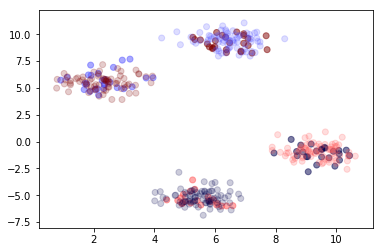

In [49]:
plt.scatter(X_test[:, 0], X_test[:, 1],
            c=y_pred,
            cmap='seismic', alpha=0.5)

plt.scatter(X_train[:, 0], X_train[:, 1],
            c=y_train,
            cmap='seismic', alpha=0.2);


# How to learn more: tips and hints
---

Pay attention to the errors:

```python
NotFittedError: This KMeans instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.```



Some ideas on things to study:

**Scoring and validating your models**:

[https://scikit-learn.org/stable/modules/learning_curve.html]()

[https://scikit-learn.org/stable/modules/cross_validation.html#multimetric-cross-validation]()


# Experience Points!
---

## Task 01

Let's play around a bit...

The following code is set up to make it easy for you to change the standard deviation for the clusters that `make_blobs()` will generate.

The initial `cluster_std` is set at `0.7` (just as it was in the examples above).
Execute the following cells to see the scatter plots showing the training data and the test/predicted data.

Then change the values for `cluster_std` to each of the following values one by one, executing the cells for each value so that you can see how the clustering model responds as the spread of the input data increases.

* 1
* 2
* 3

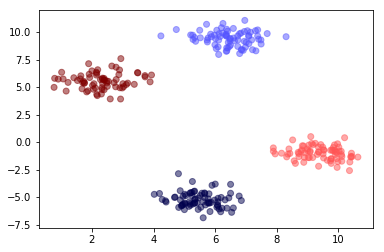

In [119]:
from sklearn.datasets.samples_generator import make_blobs

cluster_std = 0.7     # std of 0.70 gives tight clusters, try other options!
random_state = 13

X, y = make_blobs(n_samples=400,
                  centers=4,
                  cluster_std=cluster_std,
                  random_state=random_state)

X_train, X_test, y_train, y_test = train_test_split(X, y)

plt.scatter(X_train[:, 0], X_train[:, 1],
            c=y_train,
            cmap='seismic', alpha=0.5);

In [114]:
from sklearn.cluster import KMeans

In [116]:
model = KMeans(n_clusters=4)
model.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [117]:
y_pred = model.predict(X_test)

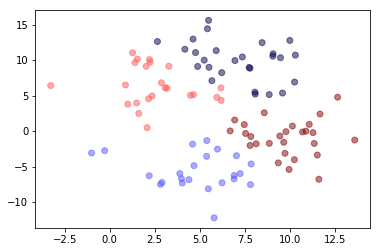

In [118]:
plt.scatter(X_test[:, 0], X_test[:, 1],
            c=y_pred,
            cmap='seismic', alpha=0.5);

---
When you complete this exercise, please put your **green** post-it on your monitor. 

If you want to continue on at your own-pace, please feel free to do so.

<img src='../universal_images/green_sticky.300px.png' width='200' style='float:left'>

# References
---

Below are references that may assist you in learning more:
    
|Title (link)|Comments|
|---|---|
|[General API Reference](https://scikit-learn.org/stable/modules/classes.html)||
|[KMeans API Reference](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)||
|[User Guide](https://scikit-learn.org/stable/modules/clustering.html#k-means)||
|[Sample datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)|Load or create datasets for practice and study|
|[Make blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs)|Specifically make clusters of values|